# Data Analysis Project 

In this project the [CRISP-DM](https://pdf4pro.com/amp/download?data_id=73581e&slug=crisp-dm-1-the-modeling-agency-com) methodology will be used to analyse income patterns in a population taking into account different characteristics. The dataset to be used is called [adults.csv](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset) and this dataset contains information on the annual income of different people. For each person there is information on some key aspects when it comes to income such as age, marital status, education level and so on.

## Business Understanding

Let's start with the understanding of the business problem, in this case the main objective is to determine if there is an income gap between individuals of different genders in the same age group.

There are some risks to bear in mind:

- It is possible that the data is biased and may give us a false picture of reality.
- it is also possible that the quality of the data is poor, so it's important to have some quality measurements about it.


## Data Understanding

### About the Dataset: 
- **Age:** Describes the age of individuals. Continuous.
- **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** Continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** Number of years spent in education. Continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **hours-per-week:** Continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income:** >50K,<=50K

Now, let's load the data and have a brief look at it:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('adult.csv')
df = df.drop(['capital-gain', 'capital-loss'], axis = 1)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [2]:
print('Our data contains {} observations and {} columns.'.format(df.shape[0],
                                                                df.shape[1]))

Our data contains 48842 observations and 13 columns.


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


From th dataset we have:
- the minimum age is **17** and the maximum is **90** with average of **37**
- the avergae time spent on education is **10** years

## Data Quality Measurement

Among various metrics of data, the most important qualities any data should have is listed down below. They are:

- Validity
- Accuracy
- Completeness
- Consistency
- Uniformity
- Relevance



Now let’s analyse these qualities one by one:

### Completeness

It is very important to check for missing values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  hours-per-week   48842 non-null  int64 
 11  native-country   48842 non-null  object
 12  income           48842 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


At first glance there seem to be no *null* or *missing* values. However, on closer inspection there are some "?" values that must be handled properly.
Now, it's very important to have a good understanding of the situation in order to find the most appropriate technique to fill in the missing data.

In [5]:
df[df=='?'] = np.nan
print(df.isnull().sum())
print('--------------------')
print(df.dtypes)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64
--------------------
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
hours-per-week      int64
native-country     object
income             object
dtype: object


### Dealing with missing values

The first thing that comes to mind when dealing with missing data is to simply remove the records (rows/observations) with the missing values, but this is not the best option in this case because a lot of data can be lost. 

Taking a deep look to the data the following columns are found with missing data

- **workclass [categorical]:** has 2799 missing values
- **occupation [categorical]** has 2809 missing values
- **native-ountry [categorical]** has 857 missing values

In this case all of the columns with missing data are categorical, so this data can be replaced using the mode (most ocurring category) of the column

 

In [6]:
import statistics as stat

## Custom function to remove null values from categorical columns using the mode
def fill_categorical_missing_data(data, column):
    data.loc[data[column].isnull(), column] = stat.mode(data[column])

In [7]:
cols_to_fill = ['workclass', 'occupation', 'native-country']

for col in cols_to_fill:
    fill_categorical_missing_data(df, col)

print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64


Let’s use the package [Ydata_ profiling](https://github.com/ydataai/ydata-profiling) to identify and measure the other metrics 




In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report").to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There are some interesting findings from the profile report:

- The dataset has **58** duplicate rows
- **education** is highly overall correlated with **educational-num**
- **gender** is highly overall correlated with **relationship**
- **workclass** is highly imbalanced (54.5%)
- **race** is highly imbalanced (65.8%)	Imbalance
- **native-country** is highly imbalanced (84.9%)

Let's remove the duplicate data:

In [9]:
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48781 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48781 non-null  int64 
 1   workclass        48781 non-null  object
 2   fnlwgt           48781 non-null  int64 
 3   education        48781 non-null  object
 4   educational-num  48781 non-null  int64 
 5   marital-status   48781 non-null  object
 6   occupation       48781 non-null  object
 7   relationship     48781 non-null  object
 8   race             48781 non-null  object
 9   gender           48781 non-null  object
 10  hours-per-week   48781 non-null  int64 
 11  native-country   48781 non-null  object
 12  income           48781 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.2+ MB


## Exploratory Data Analysis

Now let's take a look to the data

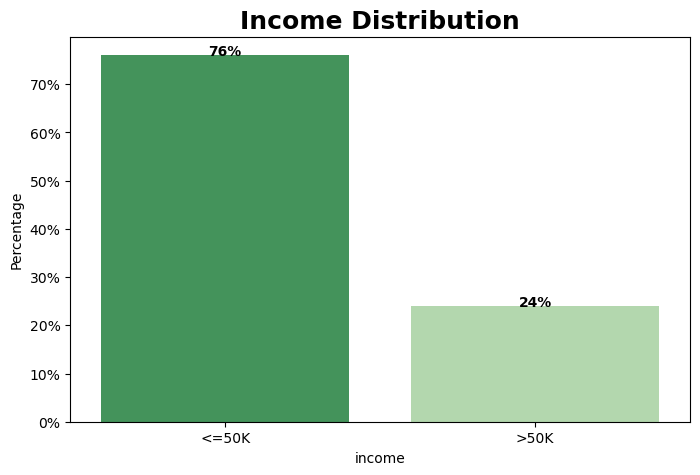

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (8,5))
plt.title('Income Distribution', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
#vals = ax.get_yticks()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1), ha='center', fontweight='bold')

From the plot is easy to see that **76%** of the population earn less than 50k per year

<AxesSubplot:title={'center':'Density plot for Age'}, ylabel='Density'>

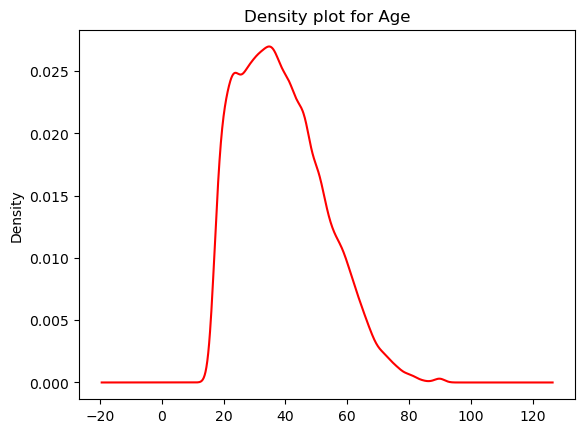

In [11]:
df['age'].plot(kind='kde', title='Density plot for Age', color='r')

We have **positive skewed** distribution of age. The highest density for the age is between 30-40 years

Now, let's define some age intervals to analyse some intersting stuff

In [12]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    else:
        return "Greater than 60"

df['age_group'] = df['age'].apply(age_group)

C:\Users\lalon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Income of individuals of different age groups')

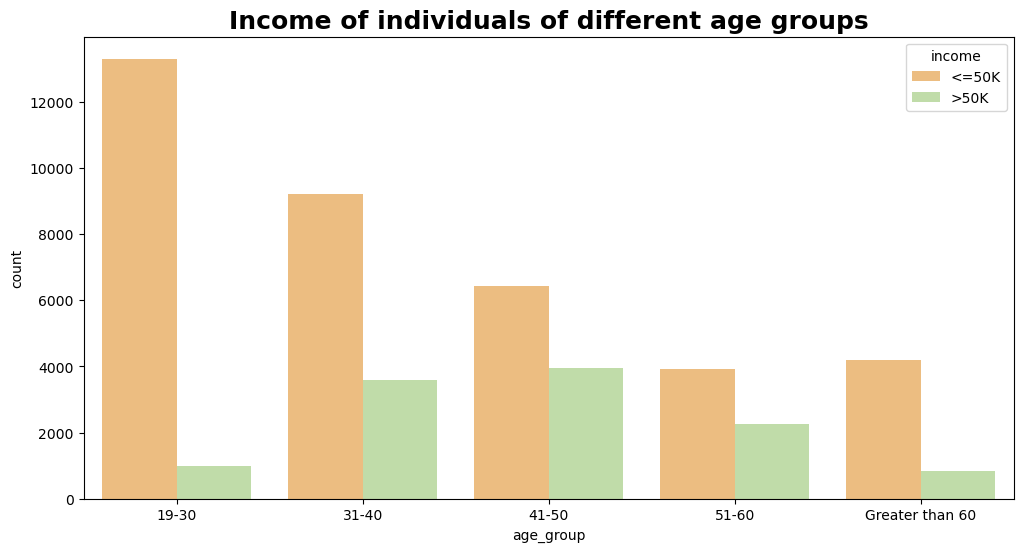

In [13]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', 'Greater than 60']
sns.countplot(df['age_group'], hue = df['income'], palette='Spectral', order = order_list)
plt.title('Income of individuals of different age groups', fontsize=18, fontweight='bold')

There are some interesting patterns obtained from the plot: 

- As age increases, income increases
- The portion of the population with greater income are between 41 and 50 years old

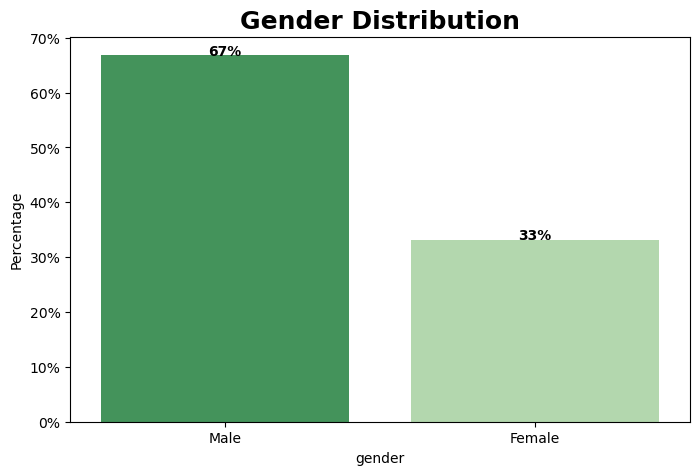

In [14]:
plt.figure(figsize = (8,5))
plt.title('Gender Distribution', fontsize=18, fontweight='bold')
eda_percentage = df['gender'].value_counts(normalize = True).rename_axis('gender').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'gender', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1), ha='center', fontweight='bold')

It is noticiable that there are more records with male individuals.

- The **67%** of the population are male individuals 
- The  **33%** of the population are female individuals

This can be a problem because it can introduce a lot of bias into the study.


C:\Users\lalon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '9910'), Text(0, 0, '1769')]

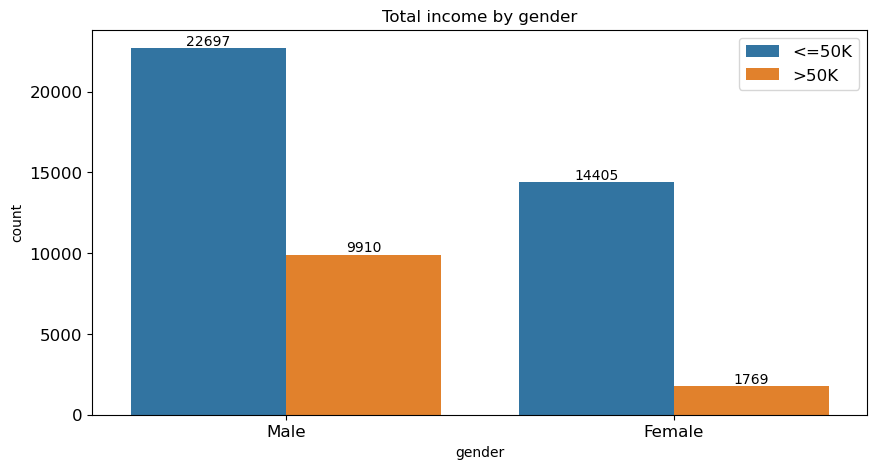

In [15]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['gender'], hue = df['income'])
plt.title('Total income by gender', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

It's pretty evident the existent gap in the earnings between males and females

- For **Females**, there are less than **10%** of the adults earning more than 50K dollars an year.
- In case of **Males** there are close to **33%** of them earning more than 50K dollars an year.
